In [20]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
from collections import defaultdict
from pathlib import Path

In [25]:
%matplotlib inline

In [2]:
x = "/eventssl-vol/particlemind/data/p8_ee_tt_ecm365/h5/reco_p8_ee_tt_ecm365_64653.hdf5"

In [4]:
object_names = ["calo_hit", "cluster", "gen", "track", "tracker_hit"]

In [5]:
counts = {}
for obj in object_names:
    counts[obj] = []

In [ ]:
def count_objects(h5_file, object_names):
    counts = {}
    for obj in object_names:
        counts[obj] = []
    
    f = h5.File(h5_file, "r")
    # event_indices
    for ei in f.keys():
        e = f[ei]
        for name in object_names:
            obj_ftrs = e[name + "_features"]
            num_objects = obj_ftrs[list(obj_ftrs.keys())[0]].shape[0]
            counts[name].append(num_objects)   
    return counts

In [21]:

merged_counts = defaultdict(list)
for path in sorted(list(Path("/eventssl-vol/particlemind/data/p8_ee_tt_ecm365/h5/").glob("*.hdf5"))):
    object_counts = count_objects(path, object_names)
    for k, v in object_counts.items():
        merged_counts[k].extend(v)

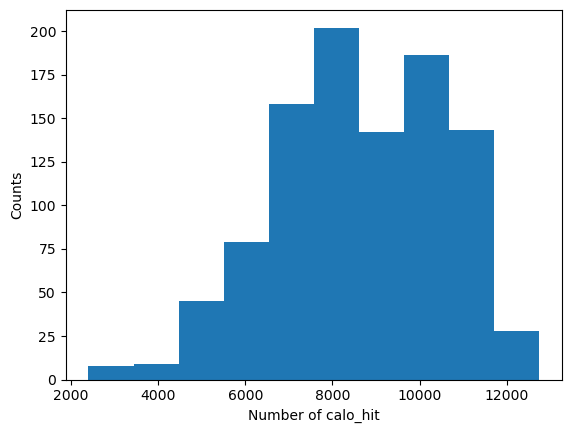

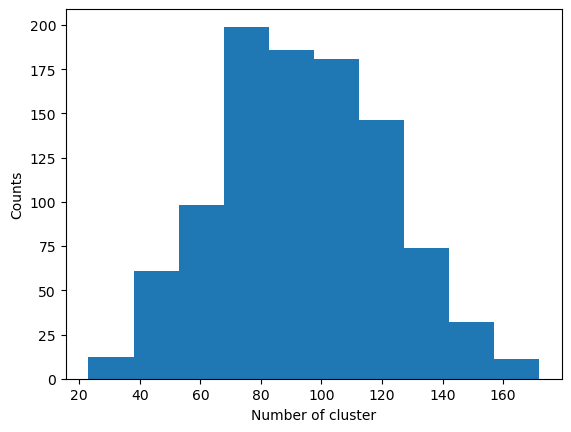

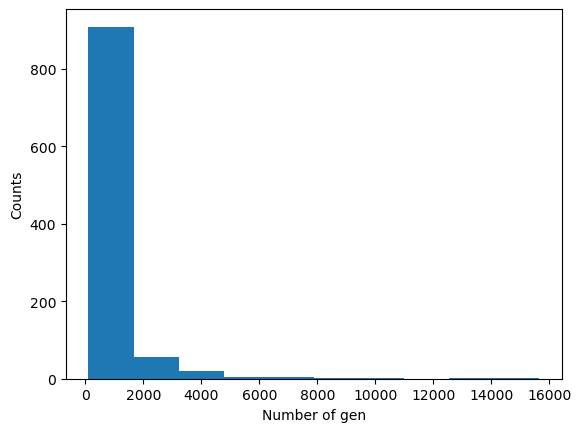

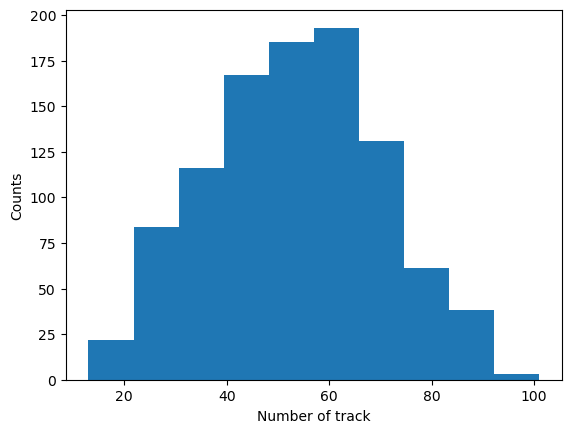

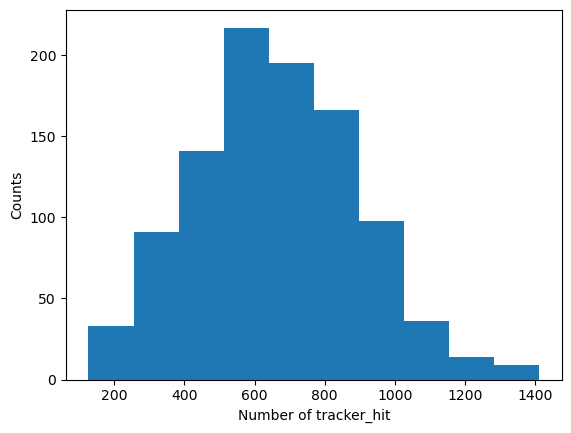

In [30]:
for k, v in merged_counts.items():
    plt.figure()
    plt.hist(v, bins=10)
    plt.title(f"")
    plt.xlabel(f"Number of {k}")
    plt.ylabel("Counts")